In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

#### Pima Indians Diabetes Dataset Analysis

#### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Acknowledgements

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

#### Import Python Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
diabetes_data = pd.read_csv("DiabetesDataset.csv")
diabetes_data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# This removes all zero values apart from Pregnancies and Outcome columns to make the dataset more accurate as columns like Blood Preassure has zero values in the dataset, which makes the dataset less accurate.

diabetes_data = diabetes_data[-(diabetes_data[diabetes_data.columns[1:-1]] == 0).any(axis = 1) ]
diabetes_data.shape

(392, 9)

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 392 non-null    int64  
 1   Glucose                     392 non-null    int64  
 2   Blood Pressure              392 non-null    int64  
 3   Skin Thickness              392 non-null    int64  
 4   Insulin                     392 non-null    int64  
 5   BMI                         392 non-null    float64
 6   Diabetes Pedigree Function  392 non-null    float64
 7   Age                         392 non-null    int64  
 8   Outcome                     392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


#### Diabetes Dataset: Mean and Median Values

In [9]:
diabetes_data.groupby('Outcome').agg(['mean', 'median']).round(2)

Pregnancies        Glucose        Blood Pressure         \
               mean median    mean median           mean median   
Outcome                                                           
0              2.72      2  111.43  107.5          68.97     70   
1              4.47      3  145.19  144.5          74.08     74   

        Skin Thickness        Insulin           BMI         \
                  mean median    mean median   mean median   
Outcome                                                      
0                27.25     27  130.85  105.0  31.75  31.25   
1                32.96     33  206.85  169.5  35.78  34.60   

        Diabetes Pedigree Function           Age         
                              mean median   mean median  
Outcome                                                  
0                             0.47   0.41  28.35     25  
1                             0.63   0.55  35.94     33

In [10]:
diabetes_data.head(5)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


#### Histogram Plots: individual Columns

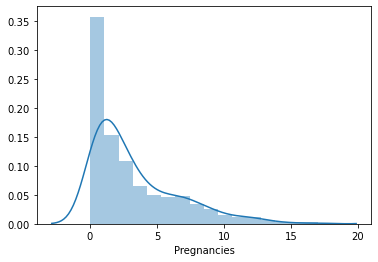

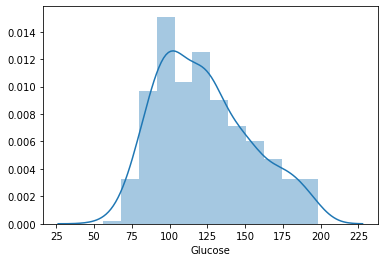

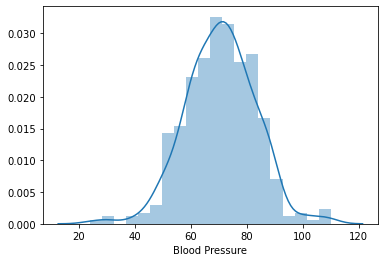

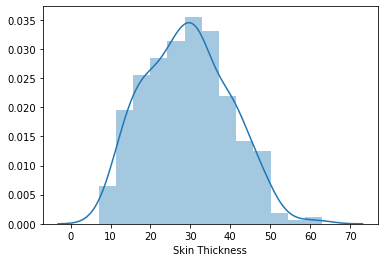

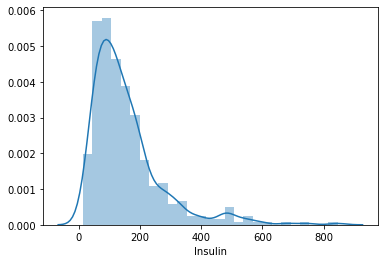

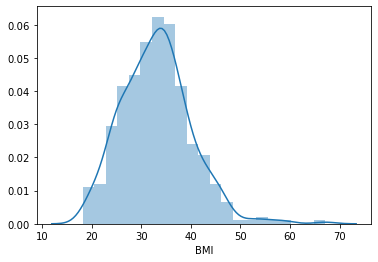

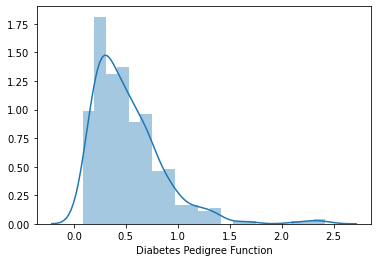

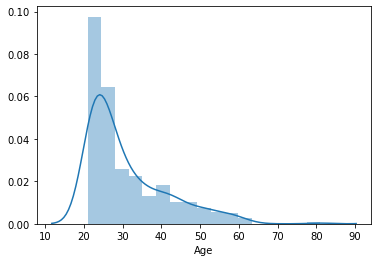

In [11]:
for i, col in enumerate (diabetes_data.columns[:-1]):
    plt.figure(i)
    sns.distplot(diabetes_data[col])

#### Histogram Plots: Individual Columns Comparison with Outcomes (Non Diabetic/Diabetic)

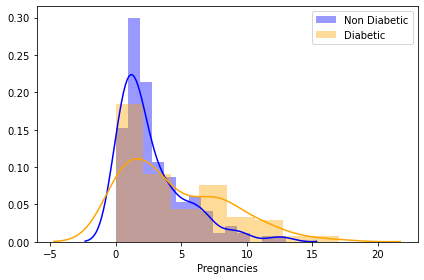

In [12]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['Pregnancies'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['Pregnancies'], color = "orange", label = "Diabetic")

plt.tight_layout()
plt.legend()
plt.show()

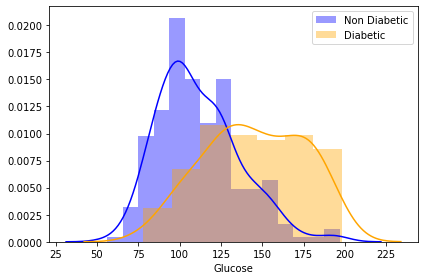

In [13]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['Glucose'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['Glucose'], color = "orange",label = "Diabetic" );

plt.tight_layout()
plt.legend()
plt.show()

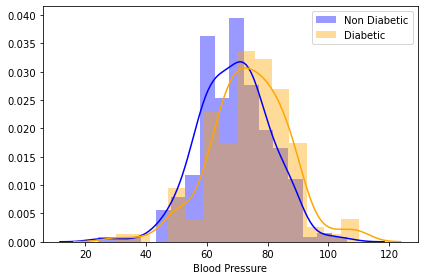

In [14]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['Blood Pressure'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['Blood Pressure'], color = "orange", label = "Diabetic");

plt.tight_layout()
plt.legend()
plt.show()

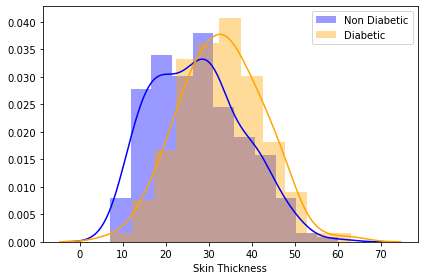

In [15]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['Skin Thickness'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['Skin Thickness'], color = "orange", label = "Diabetic");

plt.tight_layout()
plt.legend()
plt.show()

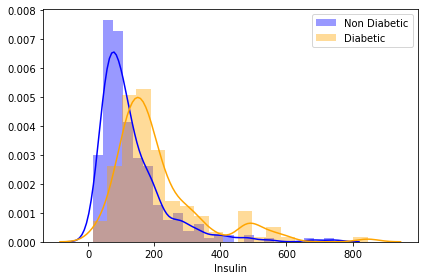

In [16]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['Insulin'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['Insulin'], color = "orange", label = "Diabetic")

plt.tight_layout()
plt.legend()
plt.show()

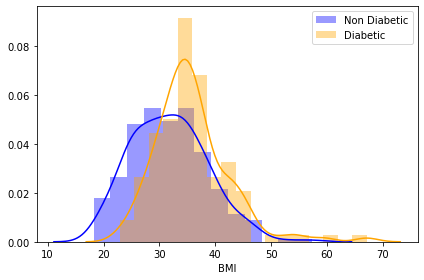

In [17]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['BMI'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['BMI'], color = "orange", label = "Diabetic")

plt.tight_layout()
plt.legend()
plt.show()

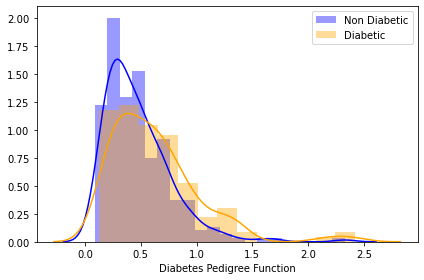

In [18]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['Diabetes Pedigree Function'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['Diabetes Pedigree Function'], color = "orange", label = "Diabetic")

plt.tight_layout()
plt.legend()
plt.show()

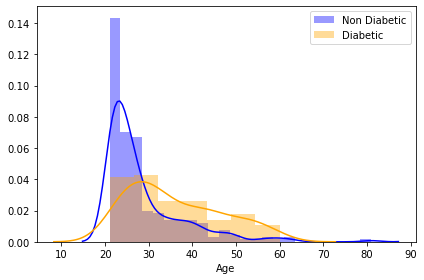

In [19]:
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 0]['Age'], color="blue", label = "Non Diabetic")
sns.distplot(diabetes_data.loc[diabetes_data['Outcome'] == 1]['Age'], color = "orange", label = "Diabetic")

plt.tight_layout()
plt.legend()
plt.show()

#### Correlation Plot

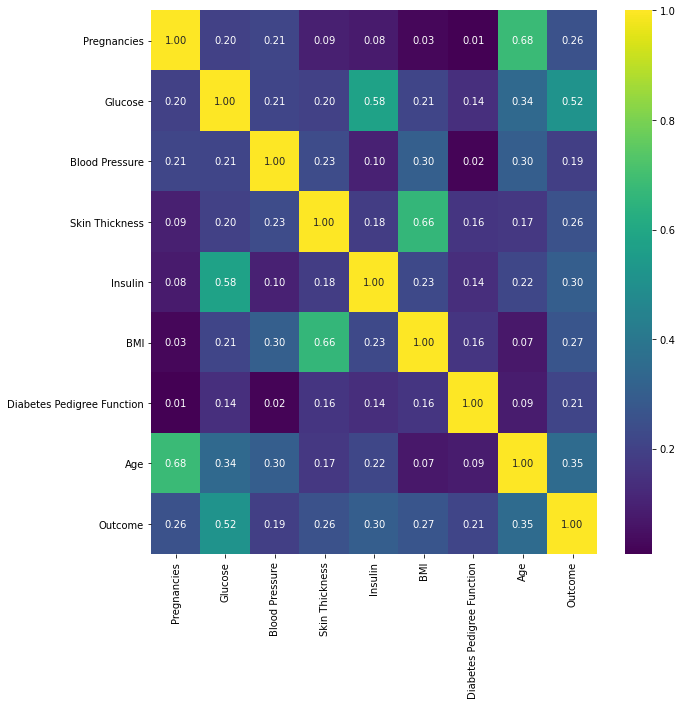

In [20]:
#diabetes_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(np.abs(diabetes_data.corr()), annot=True, cmap="viridis", fmt="0.2f");